# 문제정의: 붓꽃의 품중 분류


*   3개의 품종 중 하나를 예측하는 다중 분류 문제로 정의
*   문제집: 데이터, 특성(Feature), 독립변수(x) ->  꽃잎, 꽃받침의
길이, 4가지
*   정답: 클래스(class), 레이블(label), 타깃(target), 종속변수(y) -> 붓꽃의 품종(setosa, vrsicolor, virginica)


## 데이터 준비하기

In [9]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [11]:
iris_dataset['target'] #정답 레이블,y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris_dataset['data'] # 문제집, feature, x

In [14]:
type(iris_dataset['data'])  #넘파이에서 제공

numpy.ndarray

## 데이터와 타깃의 연관성 확인 -> 데이터 분석

In [15]:
import pandas as pd

import matplotlib.pyplot as plt

#데이터프레임을 사용하여 데이터 분석 -> data 와 target의 연관성 분석

iris_df = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


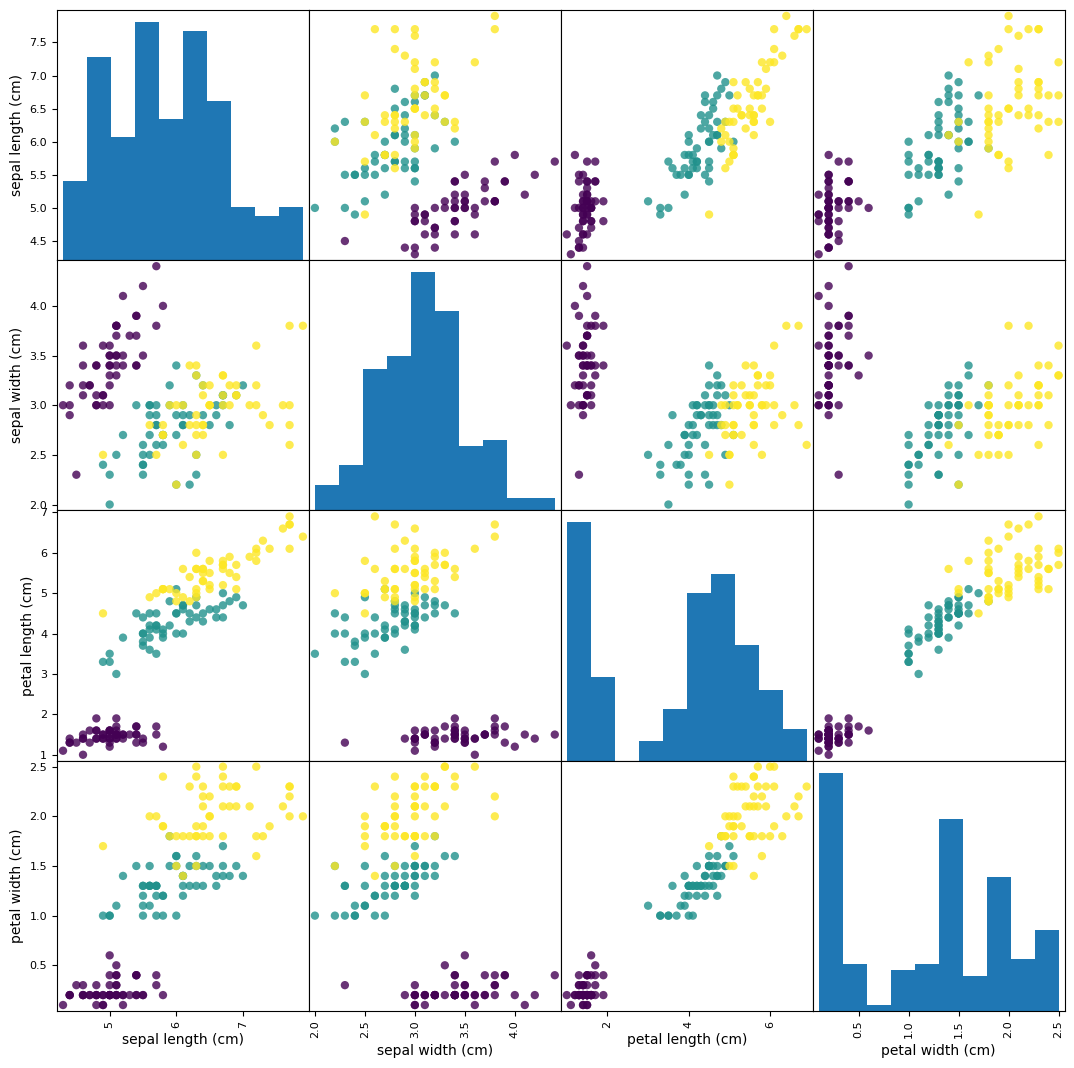

In [19]:
# 각 feature 들의 산점도 행렬 4x4

pd.plotting.scatter_matrix (iris_df, c=iris_dataset['target'], figsize= (13,13),
                            marker = 'o',alpha= .8) # 데이터 프레임 주면 가지고 있는 컬럼에 맞춰서 산점도 행렬 그려줌/ 알파 = 투명도, o = 점

plt.show()

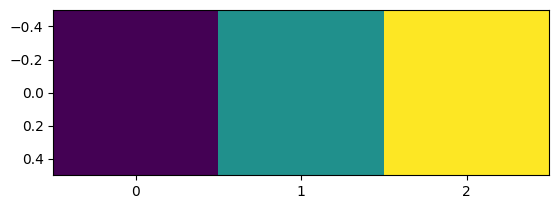

In [24]:
import numpy as np

plt.imshow([np.unique(iris_dataset['target'])])
_ = plt.xticks(ticks=np.unique(iris_dataset['target']), label = iris_dataset['target_names'])

In [25]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


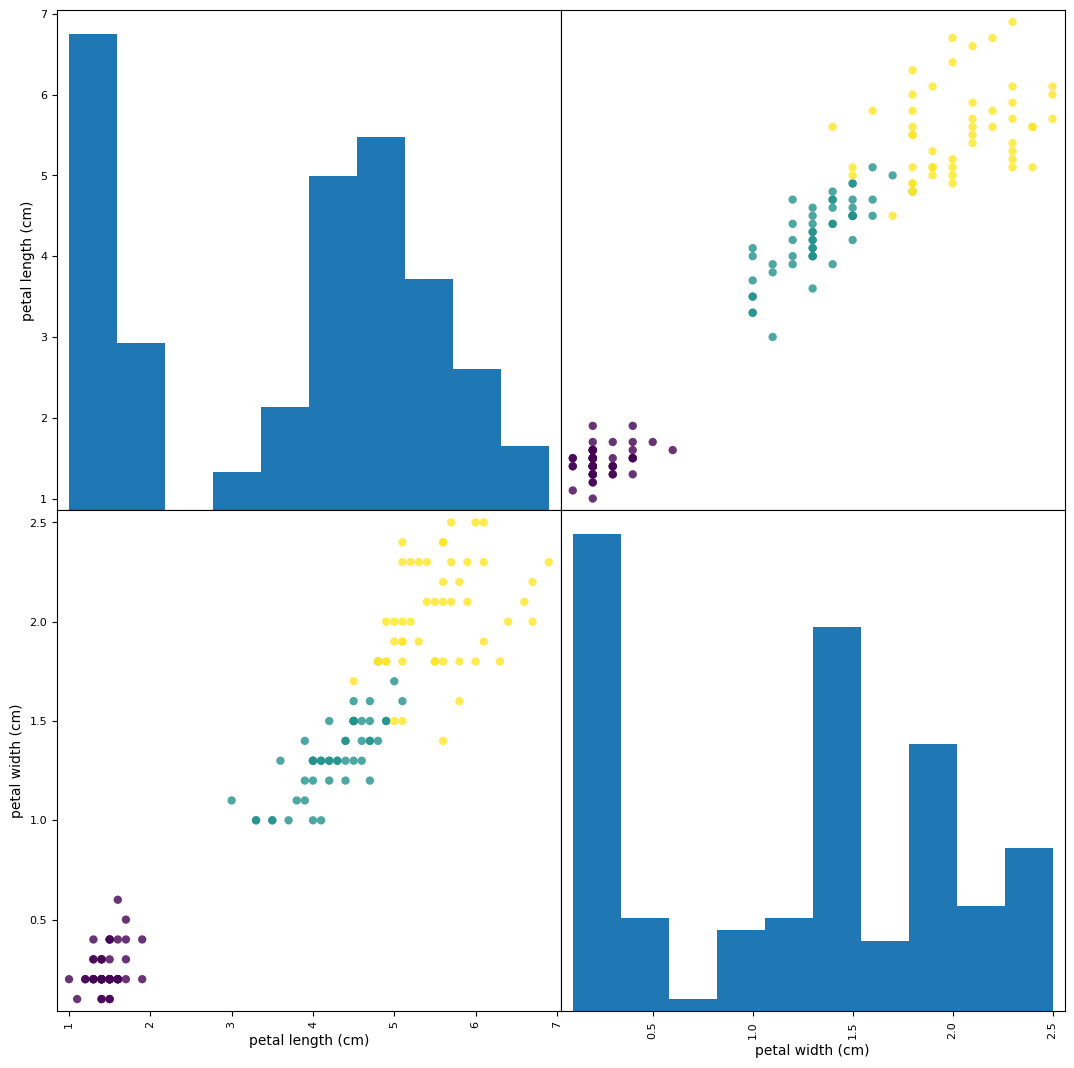

In [30]:
iris_df2 = iris_df[['petal length (cm)','petal width (cm)']]  # 이곳이 df정보 가져오는 곳. 그래프의 정보 부분

# 시각화 가져오기
pd.plotting.scatter_matrix (iris_df2, c=iris_dataset['target'], figsize= (13,13),
                            marker = 'o',alpha= .8) # 데이터 프레임 주면 가지고 있는 컬럼에 맞춰서 산점도 행렬 그려줌/ 알파 = 투명도, o = 점

plt.show()

##훈련데이터와 텍스트데이터 분리

In [31]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [32]:
# 훈련데이터 85%, 테스트데이터 15%

iris_dataset['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
from sklearn.model_selection import train_test_split #랜덤으로 섞어서 분리시켜줌

# 무조건 순서대로. 앞 x 뒤 y / 여러개의 feature가 담긴 건 대문자씀  1차원: 소문자, 다차원: 대문자/train은 학습용 데이터
#X_train, y_train 대문자 X 여러개의 피쳐가 담긴 학습용 데이터, y는 답지.

X_train, X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset ['target'],
                                                    test_size=0.15, random_state = 7) #시드 고정용 = 동일한 데이터로 잘리도록, 즉 시험이 제현 가능하도록. = 같은 고정값으로 실험해야 하니까.


# 시드값 바뀌면 결과값 바뀜.


In [67]:
# 훈련데이터 85%-> 127건의 4개의 피쳐
X_train.shape

(127, 4)

In [68]:
# 테스트데이터 15%-> 23건의 4개의 피쳐
X_test.shape

(23, 4)

In [60]:
y_train

array([0, 2, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 2, 1, 1, 0,
       2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 1,
       2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 0, 0, 1, 0,
       0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2])

## 머신러닝 모델 선택하기 -> K 최근접 이웃 알고리즘

In [69]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)

# 학습하기(지도학습)

In [70]:
knn.fit(X_train, y_train) #fit:학습함수 (독립변수,타겟)


KNeighborsClassifier(n_neighbors=1)

## 예측하기

In [71]:
y_pred = knn.predict(X_test)  # 예측한 결과를 y_pred

In [72]:
y_pred

array([2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2,
       1])

##  모델 평가하기


### 정확도 확인

In [73]:
np.mean(y_pred == y_test)

0.9130434782608695

In [ ]:
# score 함수 활용

In [74]:

knn.score(X_test, y_test)  # predict, mean 한 번에 해결해주는 함수 == score

0.9130434782608695

In [75]:
# 평가 지표 계산

from sklearn import metrics

knn_report = metrics.classification_report(y_test, y_pred)
print(knn_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.90      0.90      0.90        10
           2       0.83      0.83      0.83         6

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23

